感知机:
感知机实质上为一个二分类模型,对于一个数据集为$X_i=[x_{i1},x_{i2},...,x_{in}]$的输入,其对应的输出$y_i$可以表示为:

$$
y_i=\begin{cases}
1, & \text{if } \sum_{j=1}^n w_j x_{ij} +b \gt 0 \\
-1, & \text{otherwise}
\end{cases}
$$

其中$w_j$为权重,$b$为偏置,权重决定了模型的复杂度,偏置决定了模型的位置.

其中参数可以通过一下规则进行更新:
$$
\text{if } y_i(\sum_{j=1}^n w_j x_{ij} +b)\leq 0 \\
\begin{cases}
w_i\rightarrow w_i+y_ix_i \\
b\rightarrow b+y_i
\end{cases}
$$

上述操作等价于使用一个批量大小为1的小批量梯度下降法进行更新.同时,我们可以给出对应的损失函数为

$$
L(\mathbf{w},b)=\max(0,-y_i(\sum_{j=1}^n w_j x_{ij} +b))
$$

通过上述内容,我们可以明白,单层的感知机最后输出的结果是一个线性函数,因此其只能处理线性可分的数据集.对于非线性可分的数据集(例如异或函数XOR)我们将介绍一种新的方法,即多层感知机(MLP).

我们可以通过引入隐藏层来增加模型的非线性表达能力.假设我们引入一个隐藏层,则对应的输出可以表示为:
$$
h_k=\sigma(\sum_{j=1}^{n} w_{kj}^{(1)}x_{j}+b_k)
$$

$\sigma$为激活函数,如sigmoid函数,tanh函数等.最终层的输出方式同上述类似,即:

$$
y=\begin{cases}
1, & \text{if } \sum_{j=1}^k w_j^{(2)} h_{j} +b \gt 0 \\
-1,& \text{otherwise}
\end{cases}
$$

若把最后的输出换成Softmax函数,则可以处理多分类问题,即
$$
y_i=\text{softmax}(\sum_{j=1}^k w_j^{(2)} h_{j} +b)
$$

值得注意的是,激活函数必须为非线性函数,其原因在于,若激活函数为非线性函数,最终输出的函数仍然为线性函数,与单层感知机相同,从而失去了引入隐藏层的意义.

多层感知机的代码从零实现

In [7]:
import torch
import torchvision
import torch.nn as nn
from d2l import torch as d2l
from torchvision import transforms
from torch.utils import data
from utils.tool import train
from utils.tool import predict


In [8]:

mnist_train=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
mnist_test=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

In [9]:
train_iter=data.DataLoader(mnist_train,batch_size=256,shuffle=True)
test_iter=data.DataLoader(mnist_test,batch_size=256,shuffle=False)

In [10]:

num_inputs=784
num_outputs=10
num_hiddens=256

W1=nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2=nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

para=[W1,b1,W2,b2]

In [11]:
import numpy as np
def relu(X):
    a=torch.zeros_like(X)
    return torch.maximum(a,X)

In [12]:
def net(X):
     # Define the architecture of the neural network
     X=X.reshape((-1,num_inputs))
     H=relu(torch.matmul(X,W1)+b1)
     return torch.matmul(H,W2)+b2

In [13]:
epochs=10
trainer=torch.optim.SGD(para,lr=0.1)
loss=nn.CrossEntropyLoss(reduction='none')

训练进度:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Administrator\Desktop\dp_learn\utils\tool.py:62: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
训练进度:   0%|          | 0/10 [00:02<?, ?it/s]


KeyboardInterrupt: 

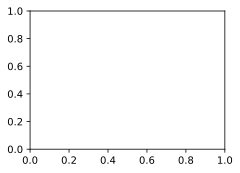

In [14]:

train(net,train_iter,test_iter,loss,trainer,epochs)

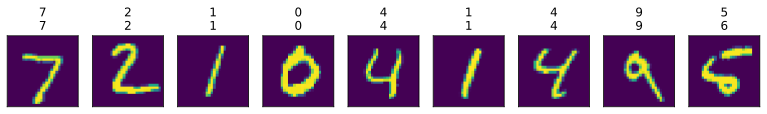

In [ ]:

predict(net,test_iter,9)

In [19]:
from utils.tool import evaluate_accuracy
print("test_acc:", evaluate_accuracy(net, test_iter))

test_acc: 0.9501


简洁实现MLP

In [15]:
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

trainer=torch.optim.SGD(net.parameters(),lr=0.1)

训练进度: 100%|██████████| 10/10 [00:33<00:00,  3.35s/it]


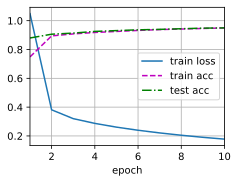

In [16]:
train(net,train_iter,test_iter,loss,trainer,epochs)

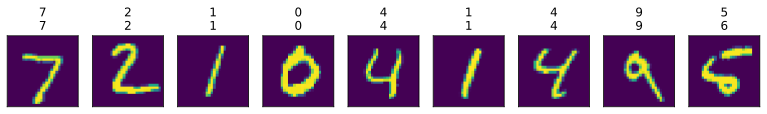

In [17]:
predict(net,test_iter,9)

In [20]:
evaluate_accuracy(net,test_iter)

0.9501

以下是课堂笔记

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim


X=torch.tensor([1.0, 2.0, 4.0, 8.0, 16.0,32.0]).reshape(-1,1)
y=torch.tensor([4.2,4.0,3.8,3.6,3.4,3.0]).reshape(-1,1)
c_0=torch.tensor([1.0],requires_grad=True)
c_1=torch.tensor([1.0],requires_grad=True)

loss=torch.nn.MSELoss()

In [34]:
def net(x):
    return c_0+c_1*torch.log(x)
net(X)

tensor([[1.0000],
        [1.6931],
        [2.3863],
        [3.0794],
        [3.7726],
        [4.4657]], grad_fn=<AddBackward0>)

In [38]:
trainer=torch.optim.SGD([c_0,c_1], lr=0.01)
num_epochs=10000
batch_size=5
from tqdm import tqdm
for epoch in tqdm(range(num_epochs),desc='训练中',):

        l = loss(net(X),torch.log(y))
        trainer.zero_grad()
        l.backward()
        trainer.step()
        if (epoch + 1) % 5000 == 0:
                print(f'epoch {epoch + 1}, loss {l.item():.6f}')
                
print('训练完成')
print(f'c_0: {torch.exp(c_0).item():.6f}, c_1: {c_1.item():.6f}')
                

      
        

训练中:  56%|█████▋    | 5630/10000 [00:00<00:00, 7112.18it/s]

epoch 5000, loss 0.000453


训练中: 100%|██████████| 10000/10000 [00:01<00:00, 6999.36it/s]

epoch 10000, loss 0.000453
训练完成
c_0: 4.272205, c_1: -0.091669


In [41]:
from sklearn.metrics import r2_score
X_train=net(X).detach().numpy()
r2_score(torch.log(y),X_train)

0.9629194140434265